In [3]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch as pt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [4]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv("braves_23_sim.csv")
df.head()
# X = df[["launch_angle", "launch_speed"]]
# y = df["is_out"]
# X, y = load_iris(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X,y, 0.2)
# clf = LogisticRegression(random_state=0).fit(X, y)
# # clf.predict(X[:2, :])
# # clf.predict_proba(X[:2, :])
# output = clf.predict(X_test)
# clf.score(y_test, output)

#"hit_direction"
X = df[["launch_angle","launch_speed", "hit_direction", "hangtime", "distance", "landing_x", "landing_y", "responsible_fielder_depth"]]
y = df["is_out"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating and fitting the Logistic Regression model
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Making predictions on the test set
predictions = clf.predict(X_test)

# Scoring the model
score = clf.score(X_test, y_test)

# Output the score
print("Model accuracy:", score)

Model accuracy: 0.7436619718309859


/Users/jackcook/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
#Exploratory Analysis
#Checking if there are missing values
df.isna().sum()


game_date                         0
game_pk                           0
player_name                       0
batter                            0
pitcher                           0
                                 ..
responsible_fielder_angle_diff    0
fielder_landing_x                 0
fielder_landing_y                 0
fielder_landing_angle_radians     0
is_out                            0
Length: 68, dtype: int64

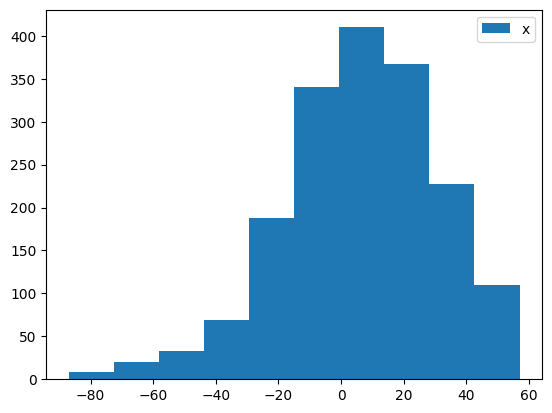

7.0

In [6]:
#Launch Angle Distribution
plt.hist(df["launch_angle"], alpha=1, label='x')
plt.legend()
plt.show()
np.median(df["launch_angle"])

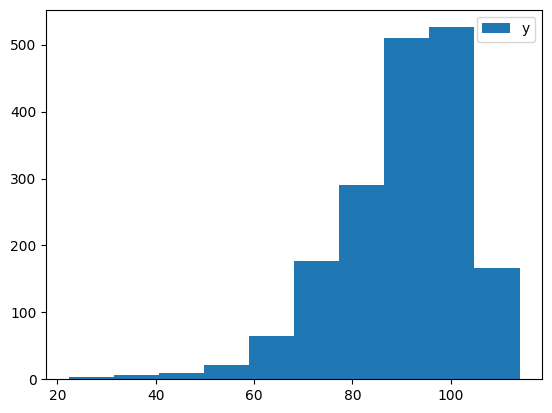

92.6

In [7]:
#Launch Speed Distribution
plt.hist(df["launch_speed"], alpha=1, label='y')
plt.legend()
plt.show()
np.median(df["launch_speed"])

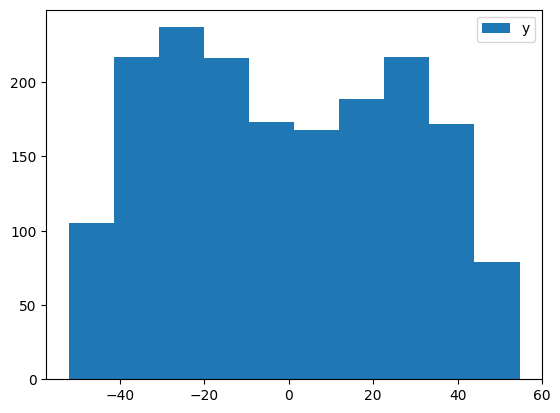

-2.0763079385254355

In [8]:
plt.hist(df["hit_direction"], alpha=1, label='y')
plt.legend()
plt.show()
np.median(df["hit_direction"])

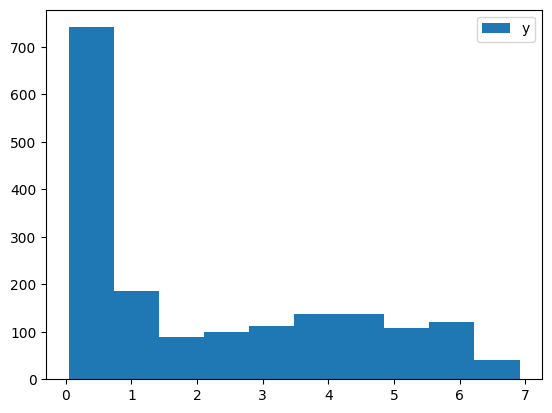

1.2492532

In [9]:
#Hangtime
plt.hist(df["hangtime"], alpha=1, label='y')
plt.legend()
plt.show()
np.median(df["hangtime"])

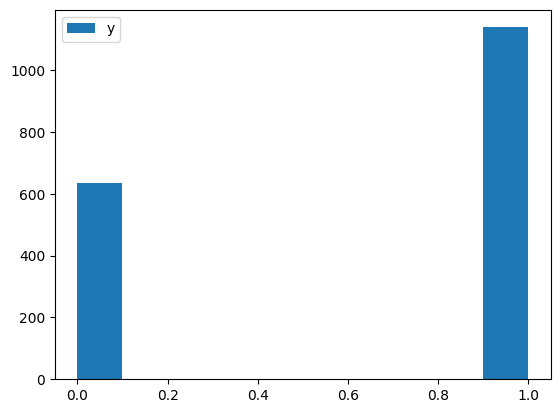

In [10]:
#is out
plt.hist(df["is_out"], alpha=1, label='y')
plt.legend()
plt.show()

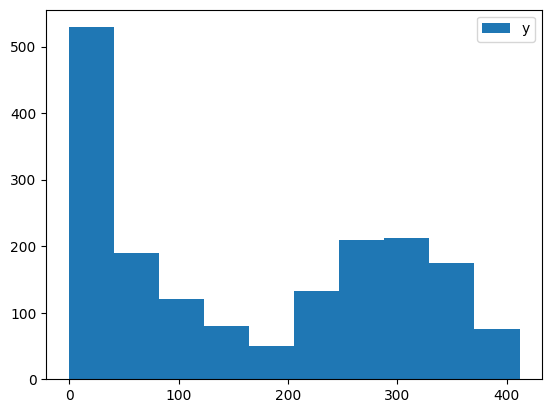

142.97517

In [11]:
# Distance
plt.hist(df["distance"], alpha=1, label='y')
plt.legend()
plt.show()
np.median(df["distance"])

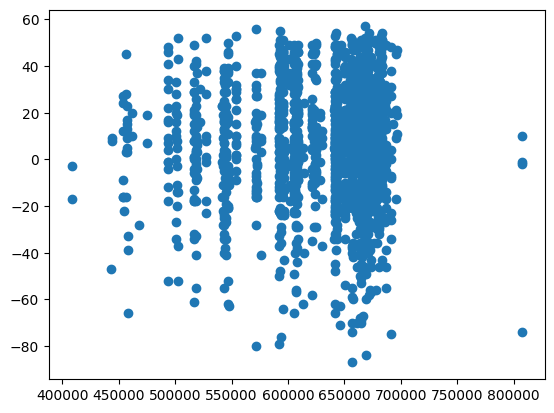

In [12]:
# Stadiums and outs
plt.scatter(x='batter', y='launch_angle', data=df)
plt.show()